In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Data Processing and EDA

In [2]:
#read in data
all_fund = pd.read_csv('all_companies_fund.csv') #2000-2019
all_bank = pd.read_csv('all_bankruptcies.csv', encoding = "ISO-8859-1") #2000-2019

C:\Users\Joseph\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (2,33,37,955,956,957,962,972,976,977,982) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\Joseph\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (263,341) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
#keys to join all databases
key_table = all_fund[['cik', 'GVKEY']] 
key_table = key_table.drop_duplicates()
key_table.head()

cik  GVKEY
0     1750.0   1004
19  910627.0   1010
23   61478.0   1013
34    2668.0   1019
36  319126.0   1021

In [4]:
mask = all_fund['stalt'] == 'TL'
tl = all_fund[mask]
tl

GVKEY LINKPRIM LIID LINKTYPE  LPERMNO  LPERMCO      LINKDT  \
73        1045        P   01       NR      NaN      NaN  01/05/2012   
473       1164        P   01       NR      NaN      NaN  07/30/2002   
867       1263        N  01C       NU      NaN      NaN  12/01/2000   
868       1263        P   01       NR      NaN      NaN  12/01/2000   
1167      1388        C  00X       NU      NaN      NaN  01/01/1983   
...        ...      ...  ...      ...      ...      ...         ...   
236932  273726        P   01       LC  93338.0  53385.0  04/15/2010   
237802  294524        C  00X       NR      NaN      NaN  01/01/2006   
237889  296944        N   01       NR      NaN      NaN  01/29/2014   
237890  296944        P   02       LC  14417.0  54709.0  01/29/2014   
237905  297209        P   01       NR      NaN      NaN  09/13/2017   

         LINKENDDT    datadate   fyear  ... priusa   sic spcindcd spcseccd  \
73      11/30/2013  12/31/2012  2012.0  ...    4.0  4512    605.0    600.0   
473     03/31/2004  12/31/2002  2002.0  ...   10.0  4813    463.0    974.0   
867     12/31/2001  12/31/2001  2001.0  ...    6.0  3312    460.0    970.0   
868     01/31/2002  12/31/2001  2001.0  ...    6.0  3312    460.0    970.0   
1167             E  12/31/2011  2011.0  ...    1.0  4512    605.0    600.0   
...            ...         ...     ...  ...    ...   ...      ...      ...   
236932  06/30/2018  12/31/2017  2017.0  ...    2.0  1381      NaN      NaN   
237802  04/29/2010  12/31/2009  2009.0  ...    1.0  2820      NaN      NaN   
237889           E  12/31/2017  2017.0  ...    2.0  1381      NaN      NaN   
237890  07/03/2018  12/31/2017  2017.0  ...    2.0  1381      NaN      NaN   
237905  12/17/2018  12/31/2017  2017.0  ...    1.0  1381      NaN      NaN   

       spcsrc state stko                   weburl       dldte     ipodate  
73         B-    TX  0.0               www.aa.com         NaN         NaN  
473       NaN    NJ  0.0  www.wcom.com/home.shtml  01/09/2006         NaN  
867       NaN    ON  2.0           www.algoma.com         NaN         NaN  
868       NaN    ON  2.0           www.algoma.com         NaN         NaN  
1167      NaN    TX  1.0               www.aa.com         NaN         NaN  
...       ...   ...  ...                      ...         ...         ...  
236932    NaN   NaN  0.0         www.seadrill.com         NaN  04/15/2010  
237802     B+   NaN  0.0   www.lyondellbasell.com         NaN         NaN  
237889    NaN   NaN  3.0         www.nadlcorp.com  07/03/2018         NaN  
237890    NaN   NaN  3.0         www.nadlcorp.com  07/03/2018         NaN  
237905    NaN    TX  0.0  www.pacificdrilling.com         NaN  11/11/2011  

[788 rows x 988 columns]

In [5]:
all_fund[all_fund['GVKEY'] == 273726][['datadate','stalt','cik']]

datadate stalt        cik
236923  12/31/2008   NaN  1737706.0
236924  12/31/2009   NaN  1737706.0
236925  12/31/2010   NaN  1737706.0
236926  12/31/2011   NaN  1737706.0
236927  12/31/2012   NaN  1737706.0
236928  12/31/2013   NaN  1737706.0
236929  12/31/2014   NaN  1737706.0
236930  12/31/2015   NaN  1737706.0
236931  12/31/2016   NaN  1737706.0
236932  12/31/2017    TL  1737706.0
236933  12/31/2018   NaN  1737706.0
236934  12/31/2018   NaN  1737706.0

In [6]:
all_bank[all_bank['COMPANY_FKEY'] == 1737706]

Empty DataFrame
Columns: [BANK_KEY, SUBSID_NAME, BANKRUPTCY_TYPE, LAW_COURT_FKEY, COURT_TYPE_CODE, COURT_NAME, COURT_S_NAME, COURT_LOC_STREET, COURT_LOC_CITY, COURT_LOC_STATE, COURT_LOC_ZIP, COURT_LOC, COURT_URL, LAW_COURT_STATE_NAME, LAW_COURT_COUNTRY, LAW_COURT_REG, LAW_COURT_CON_SUPER_REG, BANK_BEGIN_DATE, BANK_END_DATE, FTP_FILE_FKEY, FORM_FKEY, FILE_DATE, FILE_ACCEPTED, FILE_SIZE, HTTP_NAME_HTML, HTTP_NAME_TEXT, COMPANY_FKEY, BEST_EDGAR_TICKER, MATCHQU_PRICE_DATE, MATCHQU_PRICE_CLOSE, MATCHQU_TSO_DATE, MATCHQU_TSO, MATCHQU_TSO_MARKCAP, MATCHQU_DATE_QTR, MATCHQU_DATE_TTM, MATCHQU_FILING_CODE_QTR, MATCHQU_FILING_CODE_TTM, MATCHQU_ANNUAL_QUINDIC, MATCHQU_BALSH_BOOK_VAL, MATCHQU_BALSH_ASSETS, MATCHQU_BALSH_CASH_EQUIVS, MATCHQU_INCMST_REV_QTR, MATCHQU_INCMST_REV_TTM, MATCHQU_INCMST_NETINC_QTR, MATCHQU_INCMST_NETINC_TTM, MATCHQU_INCMST_EXTRAITM_QTR, MATCHQU_INCMST_EXTRAITM_TTM, MATCHQU_INCMST_EBITDA_QTR, MATCHQU_INCMST_EBITDA_TTM, MATCHQU_EFF_ACCCHANGE_QTR, MATCHQU_EFF_ACCCHANGE_TTM, MATCHQU_CSHFLST_OP_ACT_QTR, MATCHQU_CSHFLST_OP_ACT_TTM, MATCHQU_CSHFLST_INV_ACT_QTR, MATCHQU_CSHFLST_INV_ACT_TTM, MATCHQU_CSHFLST_FIN_ACT_QTR, MATCHQU_CSHFLST_FIN_ACT_TTM, MATCHQU_CSHFLST_CHANGE_QTR, MATCHQU_CSHFLST_CHANGE_TTM, PRIORQU_PRICE_DATE, PRIORQU_PRICE_CLOSE, PRIORQU_TSO_DATE, PRIORQU_TSO, PRIORQU_TSO_MARKCAP, PRIORQU_DATE_QTR, PRIORQU_DATE_TTM, PRIORQU_FILING_CODE_QTR, PRIORQU_FILING_CODE_TTM, PRIORQU_ANNUAL_QUINDIC, PRIORQU_BALSH_BOOK_VAL, PRIORQU_BALSH_ASSETS, PRIORQU_BALSH_CASH_EQUIVS, PRIORQU_INCMST_REV_QTR, PRIORQU_INCMST_REV_TTM, PRIORQU_INCMST_NETINC_QTR, PRIORQU_INCMST_NETINC_TTM, PRIORQU_INCMST_EXTRAITM_QTR, PRIORQU_INCMST_EXTRAITM_TTM, PRIORQU_INCMST_EBITDA_QTR, PRIORQU_INCMST_EBITDA_TTM, PRIORQU_EFF_ACCCHANGE_QTR, PRIORQU_EFF_ACCCHANGE_TTM, PRIORQU_CSHFLST_OP_ACT_QTR, PRIORQU_CSHFLST_OP_ACT_TTM, PRIORQU_CSHFLST_INV_ACT_QTR, PRIORQU_CSHFLST_INV_ACT_TTM, PRIORQU_CSHFLST_FIN_ACT_QTR, PRIORQU_CSHFLST_FIN_ACT_TTM, PRIORQU_CSHFLST_CHANGE_QTR, PRIORQU_CSHFLST_CHANGE_TTM, MATCHFY_PRICE_DATE, MATCHFY_PRICE_CLOSE, MATCHFY_TSO_DATE, MATCHFY_TSO, MATCHFY_TSO_MARKCAP, MATCHFY_DATE_QTR, MATCHFY_DATE_TTM, MATCHFY_FILING_CODE_QTR, MATCHFY_FILING_CODE_TTM, MATCHFY_ANNUAL_QUINDIC, ...]
Index: []

[0 rows x 464 columns]

## Bankruptcy Data EDA

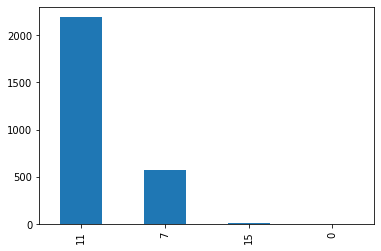

In [7]:
all_bank['BANKRUPTCY_TYPE'].value_counts().plot(kind = 'bar')

In [8]:
#extract useful information
all_bank = all_bank[['BANKRUPTCY_TYPE', 'BANK_BEGIN_DATE', 'SIC_CODE_FKEY', 'SIC_CODE_DESCRIP', 'NAICS_CODE_DESCRIP', 'NAICS_CODE_FKEY', 'SHORT_NAME', 'NAME', 'COMPANY_FKEY']]

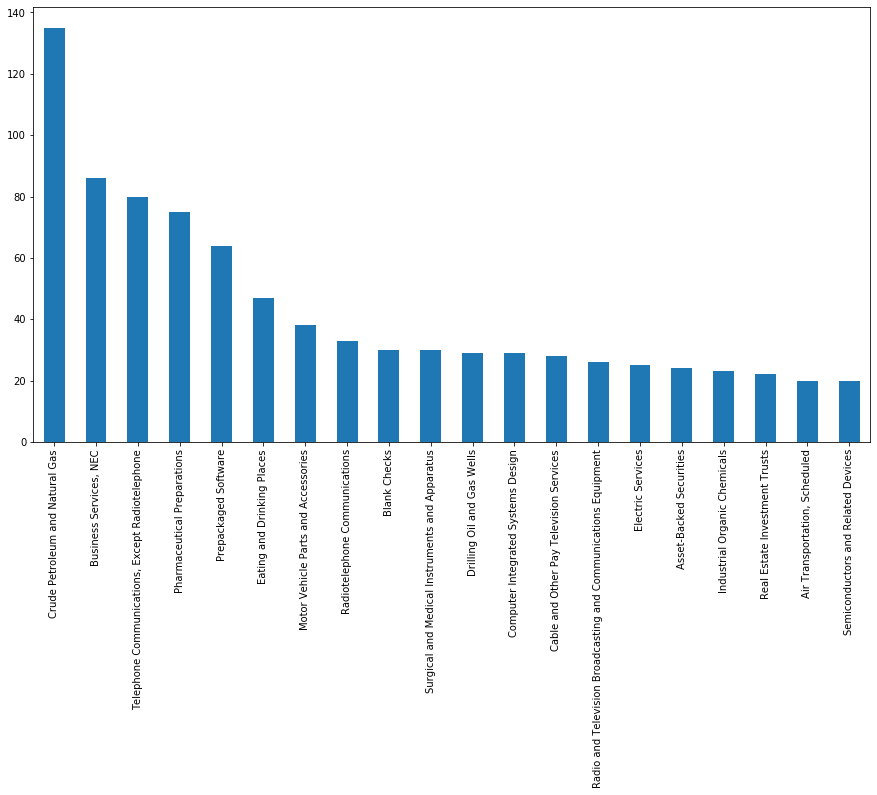

In [9]:
#top 20 industries with most bankruptcies using SIC code

all_bank['SIC_CODE_DESCRIP'].value_counts(ascending = False)[:20].plot(kind = 'bar', figsize = (15,8))

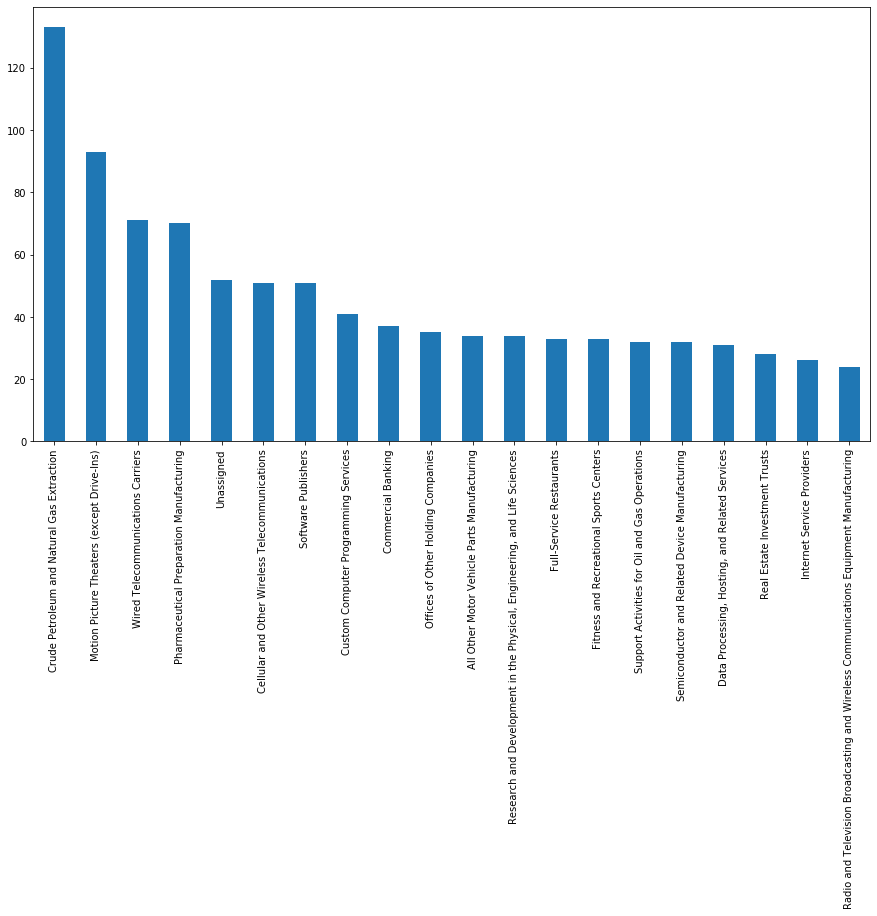

In [10]:
#top 20 industries with most bankruptcies using NICS code

all_bank['NAICS_CODE_DESCRIP'].value_counts(ascending = False)[:20].plot(kind = 'bar', figsize = (15,8))

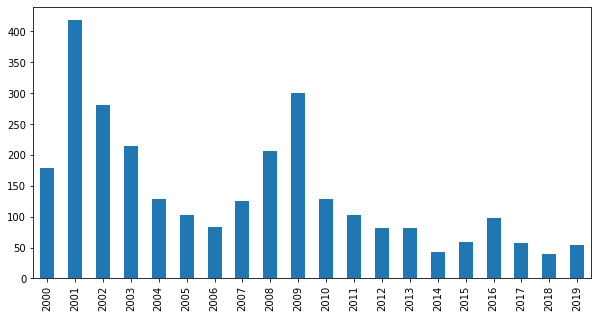

In [11]:
all_bank['year'] = pd.to_datetime(all_bank['BANK_BEGIN_DATE']).dt.year
all_bank['year'].value_counts().sort_index().plot(kind = 'bar', figsize = (10,5))

In [12]:
# gvkey_list = str(list(all_fund['GVKEY'].unique())).strip('\'').strip('[').strip(']').split(', ')

# # Write to txt file to look up relevant companies in Audit Analytics database
# # file = open('all_GVKEY.txt','w')
# # for i in all_fund['GVKEY']:
# #     file.write(str(i))
# #     file.write('\n')
# # file.close()

print(all_fund['GVKEY'].nunique(), 'of unique GVKEYs')
print(all_fund['cik'].nunique(), 'of unique ciks')
print('cik is the only way to join to bankruptcy data, might explain why so many bankruptcies were dropped')

24933 of unique GVKEYs
17998 of unique ciks
cik is the only way to join to bankruptcy data, might explain why so many bankruptcies were dropped


In [13]:
# all_bank.groupby(['year', 'NAICS_CODE_DESCRIP'])[['NAICS_CODE_DESCRIP']].count().unstack().to_csv('industrybank.csv')

In [14]:
# all_bank.groupby(['year', 'SIC_CODE_DESCRIP'])[['NAICS_CODE_DESCRIP']].count().unstack().to_csv('sicbank.csv')

In [15]:
all_bank.shape

(2779, 10)

In [16]:
f_keys = list(all_bank['COMPANY_FKEY'])

In [17]:
ciks = list(key_table['cik'])

In [18]:
#test how many bankrupt Fkeys are in fundamental
x = [] 
for i in f_keys:
    
    if i in ciks:
        continue
    
    else:
        x.append(i)
        print (i, 'not in fundamental')

3662 not in fundamental
3941 not in fundamental
4707 not in fundamental
5588 not in fundamental
6948 not in fundamental
8109 not in fundamental
12105 not in fundamental
13156 not in fundamental
18530 not in fundamental
23778 not in fundamental
23778 not in fundamental
27960 not in fundamental
28761 not in fundamental
30419 not in fundamental
30419 not in fundamental
34879 not in fundamental
40730 not in fundamental
43960 not in fundamental
45791 not in fundamental
46601 not in fundamental
47968 not in fundamental
53453 not in fundamental
56824 not in fundamental
57201 not in fundamental
59401 not in fundamental
60064 not in fundamental
60064 not in fundamental
65202 not in fundamental
67199 not in fundamental
70412 not in fundamental
72655 not in fundamental
75234 not in fundamental
76741 not in fundamental
79839 not in fundamental
82925 not in fundamental
87888 not in fundamental
94026 not in fundamental
94601 not in fundamental
96294 not in fundamental
97579 not in fundamental
99321 

1044440 not in fundamental
1044583 not in fundamental
1044649 not in fundamental
1045550 not in fundamental
1045703 not in fundamental
1046356 not in fundamental
1046777 not in fundamental
1047153 not in fundamental
1047368 not in fundamental
1047860 not in fundamental
1048845 not in fundamental
1049618 not in fundamental
1049620 not in fundamental
1049889 not in fundamental
1050119 not in fundamental
1050835 not in fundamental
1051254 not in fundamental
1051381 not in fundamental
1052245 not in fundamental
1054524 not in fundamental
1054748 not in fundamental
1054992 not in fundamental
1055131 not in fundamental
1055684 not in fundamental
1056286 not in fundamental
1057725 not in fundamental
1057827 not in fundamental
1057831 not in fundamental
1057834 not in fundamental
1057836 not in fundamental
1058627 not in fundamental
1058628 not in fundamental
1058629 not in fundamental
1058631 not in fundamental
1058767 not in fundamental
1058956 not in fundamental
1059363 not in fundamental
1

1205181 not in fundamental
1207856 not in fundamental
1208833 not in fundamental
1210036 not in fundamental
1210936 not in fundamental
1215942 not in fundamental
1216462 not in fundamental
1216964 not in fundamental
1219097 not in fundamental
1223667 not in fundamental
1224923 not in fundamental
1226932 not in fundamental
1227728 not in fundamental
1230489 not in fundamental
1238289 not in fundamental
1244041 not in fundamental
1244087 not in fundamental
1252956 not in fundamental
1255107 not in fundamental
1256582 not in fundamental
1257296 not in fundamental
1265238 not in fundamental
1265239 not in fundamental
1265241 not in fundamental
1265242 not in fundamental
1265243 not in fundamental
1265244 not in fundamental
1265245 not in fundamental
1265251 not in fundamental
1265253 not in fundamental
1265254 not in fundamental
1265255 not in fundamental
1265256 not in fundamental
1265259 not in fundamental
1265260 not in fundamental
1265262 not in fundamental
1265263 not in fundamental
1

1536256 not in fundamental
1541354 not in fundamental
1551510 not in fundamental
1554923 not in fundamental
1555082 not in fundamental
1579010 not in fundamental
1585644 not in fundamental
1588242 not in fundamental


In [19]:
print('Of', len(f_keys), 'bankrupt companies,', len(x), 'companies are not in fundamental dataset')

Of 2779 bankrupt companies, 1085 companies are not in fundamental dataset


In [20]:
# # gvkey_list = str(list(all_fund['GVKEY'].unique())).strip('\'').strip('[').strip(']').split(', ')

# # Write to txt file to look up relevant companies in Audit Analytics database
# file = open('all_fkey.txt','w')
# for i in all_bank['COMPANY_FKEY']:
#     file.write(str(i))
#     file.write('\n')
# file.close()

In [21]:
#used bankruptcy Fkey to query fundamental data, turns out a lot of ciks do not return fundamental data
fund_bank = pd.read_csv('fund_bank.csv')
fund_bank['cik'].nunique()

C:\Users\Joseph\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (23,33,955,956,958,959,965,976,977,980,981,982,983,985,989,995,996,999,1002,1005,1010,1017,1018,1021,1025,1030,1033,1034,1039,1049,1050,1055,1056,1057,1058,1059,1060,1061,1065,1066,1069,1070,1072,1074,1076,1077,1081,1082,1083,1093,1095,1099,1100,1107,1111,1112,1113,1114,1116,1120,1127,1134,1137,1141,1144,1145,1146,1148,1149,1150,1159,1160,1162,1163,1164,1165,1167,1168,1829,1830,1836,1850,1851) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


1798

In [22]:
print('will move forward with the companies with fundamental data')
print('might be benefitial to figure out why so many companies do not have fundamental data')

will move forward with the companies with fundamental data
might be benefitial to figure out why so many companies do not have fundamental data


## Merge fundamental and bankruptcy and financial ratios


In [23]:
fund_bank = pd.merge(all_fund, all_bank, left_on = 'cik', right_on = 'COMPANY_FKEY', suffixes = ('_fund', '_bank'), how = 'left')
fund_bank['cik'].nunique()

17998

In [24]:
bankrupt_key  = pd.merge(all_bank, key_table, left_on = 'COMPANY_FKEY', right_on = 'cik', suffixes = ('_ratio', '_key'), how = 'inner')


In [25]:
all_fin_ratios  = pd.read_csv('all_fin_ratios.csv')

In [26]:
#only keep year end financial ratios for each company
all_fin_ratios=all_fin_ratios.drop_duplicates(subset=['gvkey','qdate'], keep='last')
all_fin_ratios['qmonth']=pd.to_datetime(all_fin_ratios['qdate']).dt.month
mask= all_fin_ratios['qmonth']==12
all_fin_ratios= all_fin_ratios[mask]

all_fin_ratios.shape

(75263, 76)

In [27]:
fin_gv = list(all_fin_ratios['gvkey'].unique())

fund_gv = list(all_fund['GVKEY'].unique())

#test how many bankrupt Fkeys are in fundamental
x = [] 
for i in fin_gv:
    
    if i in fund_gv:
        continue
    
    else:
        x.append(i)
        print (i, 'not in fundamental')

1411 not in fundamental
1542 not in fundamental
3391 not in fundamental
4806 not in fundamental
5181 not in fundamental
6282 not in fundamental
7503 not in fundamental
7837 not in fundamental
8248 not in fundamental
11768 not in fundamental
13486 not in fundamental
14825 not in fundamental
17164 not in fundamental
17560 not in fundamental
18693 not in fundamental
18769 not in fundamental
18914 not in fundamental
22525 not in fundamental
23692 not in fundamental
24779 not in fundamental
25271 not in fundamental
29402 not in fundamental
29982 not in fundamental
30240 not in fundamental
30599 not in fundamental
30757 not in fundamental
30764 not in fundamental
31097 not in fundamental
61606 not in fundamental
62004 not in fundamental
62069 not in fundamental
62338 not in fundamental
62450 not in fundamental
62513 not in fundamental
63207 not in fundamental
64509 not in fundamental
64996 not in fundamental
65629 not in fundamental
65667 not in fundamental
65882 not in fundamental
65936 not

62519 not in fundamental
62535 not in fundamental
62659 not in fundamental
62690 not in fundamental
62697 not in fundamental
62707 not in fundamental
62737 not in fundamental
62759 not in fundamental
62932 not in fundamental
63013 not in fundamental
63140 not in fundamental
63182 not in fundamental
63199 not in fundamental
63200 not in fundamental
63201 not in fundamental
63225 not in fundamental
63278 not in fundamental
63296 not in fundamental
63478 not in fundamental
63509 not in fundamental
63641 not in fundamental
63693 not in fundamental
63744 not in fundamental
63770 not in fundamental
63775 not in fundamental
63779 not in fundamental
63791 not in fundamental
63797 not in fundamental
63832 not in fundamental
63877 not in fundamental
63886 not in fundamental
63918 not in fundamental
63920 not in fundamental
64168 not in fundamental
64174 not in fundamental
64198 not in fundamental
64200 not in fundamental
64299 not in fundamental
64307 not in fundamental
64345 not in fundamental


In [28]:
print('Of', len(fin_gv), 'companies with financial ratios', len(x), 'companies are not in fundamental dataset')

Of 9466 companies with financial ratios 560 companies are not in fundamental dataset


In [29]:
fin_ratio_bankruptcy = pd.merge(all_fin_ratios, bankrupt_key, left_on = 'gvkey', right_on = 'GVKEY', suffixes = ('_finratio', '_bankrupt'), how = 'left')


In [30]:
mask = pd.to_datetime(fin_ratio_bankruptcy['adate']).dt.year + 1 == pd.to_datetime(fin_ratio_bankruptcy['BANK_BEGIN_DATE']).dt.year

fin_ratio_bankruptcy['bankrupted'] = np.where(mask, 1,0)

In [31]:
#might want to check why so few bankruptcies exist in this final merge dataset
fin_ratio_bankruptcy['bankrupted'].sum()

518

In [32]:
fin_ratio_bankruptcy['year'] = pd.to_datetime(fin_ratio_bankruptcy['adate']).dt.year
all_fund['year'] =  pd.to_datetime(all_fund['datadate']).dt.year


In [33]:
fund_ratio_bank  = pd.merge(all_fund, fin_ratio_bankruptcy, left_on = ['GVKEY', 'year'], right_on = ['gvkey', 'year'], suffixes = ('_fund', '_ratio'), how = 'inner')
fund_ratio_bank = fund_ratio_bank.drop(columns = 'GVKEY_ratio')
fund_ratio_bank = fund_ratio_bank.rename(columns = {'GVKEY_fund' : 'GVKEY'})

In [34]:
print('The final dataset includes:',fund_ratio_bank['GVKEY'].nunique(), 'companies, which have fundamental as well as financial ratios values, and', fund_ratio_bank['bankrupted'].sum(), 'bankruptcies')

The final dataset includes: 8673 companies, which have fundamental as well as financial ratios values, and 511 bankruptcies


## Final EDA

In [35]:
#filter for market cap size (in MM)
#recommend using this after creating bankruptcy dummy

def market_cap_size(df, lower, upper):
    
    mask = ((df['mkvalt'] >=lower) & (df['mkvalt'] <=upper))
    df =df[mask]
    
    return df


# #market cap 500M - 1B
# df500 = market_cap_size(fund_ratio_bank, 0,1000)

# df500['GVKEY'].nunique()

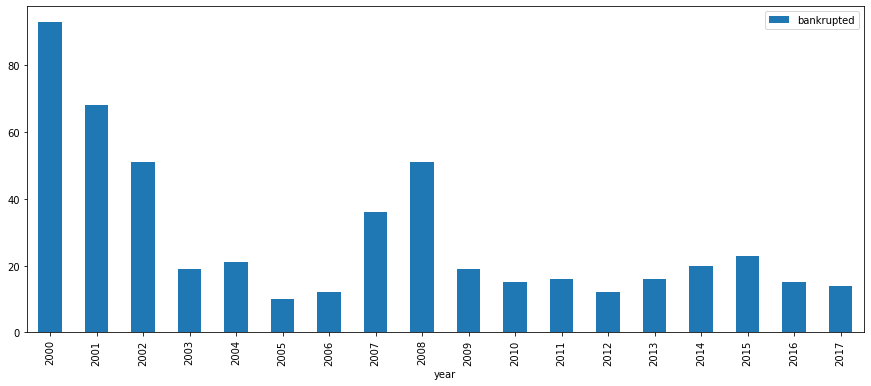

In [36]:
fund_ratio_bank.groupby('year')[['bankrupted']].sum().plot(kind = 'bar', figsize = (15,6))

In [37]:
final_bank = fund_ratio_bank [fund_ratio_bank['bankrupted']==1]

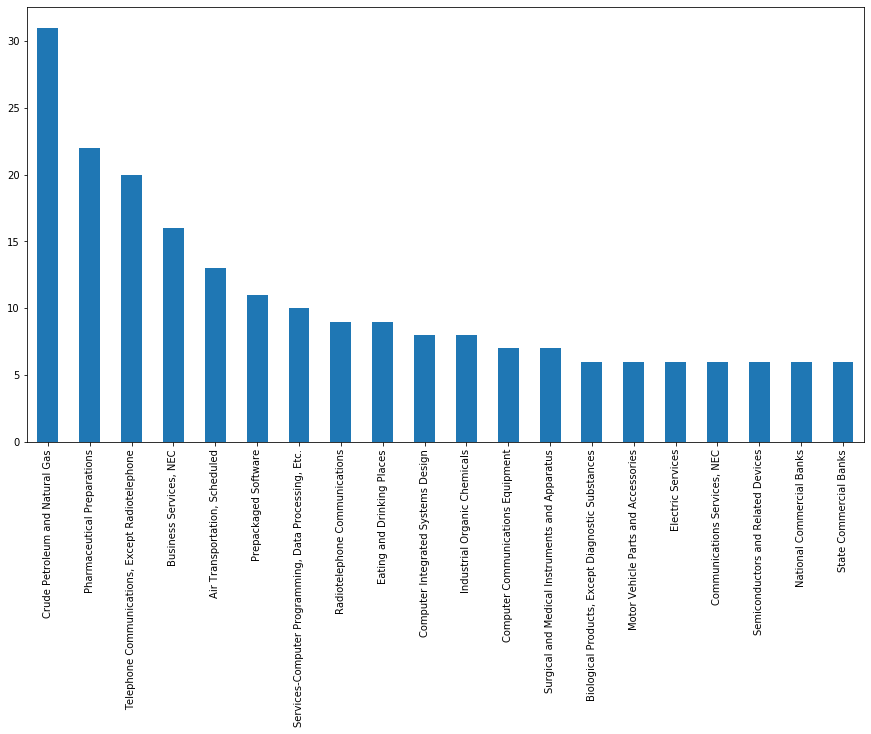

In [38]:
final_bank['SIC_CODE_DESCRIP'].value_counts(ascending = False)[:20].plot(kind = 'bar', figsize = (15,8))

most bankrptcies happened with companies with small market caps


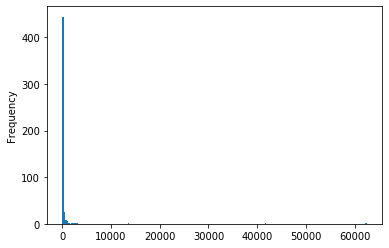

In [39]:
#bankrupt companies usually have small market caps
final_bank['mkvalt'].plot(kind = 'hist', bins = 200)#.value_counts(ascending = False)[:20].plot(kind = 'bar', figsize = (15,8))
print('most bankrptcies happened with companies with small market caps')

## Next steps:
1. figure out why so many bankrupted companies do not have fundamental data (is it how the database was constructed? fundamental dataset would get rid of bankrupted or acquired companies?)

2. figure out why only 500 or so bankruptcies exist in the final dataset, down from 1000 (bankrupt companies with fundamental data) --> hypothesis is some fin ratios companies do not have fundamental data and those happen to be the ones with bankrupt data. Need to check 

3. model development. Note that the current dataset includes data from 2000 - 2019. Need to filter out dates


# Modeling

In [69]:
mask = (fund_ratio_bank['fyear'] >= 2000) & (fund_ratio_bank['fyear'] <= 2010)

df_2000_2010 = fund_ratio_bank[mask]

In [70]:
mask = (fund_ratio_bank['fyear'] == 2011)

df_2011 = fund_ratio_bank[mask]

In [71]:
lista=[]
for i in all_fin_ratios.columns:
    lista.append(i)

In [72]:
lista.append('bankrupted')
lista.append('fyear')

In [73]:
df_2000_2010 = df_2000_2010[lista]
df_2011 = df_2011[lista]


In [74]:
df_2000_2010 = df_2000_2010.drop(columns = ['gvkey'])
df_2011 = df_2011.drop(columns = ['gvkey'])

In [75]:
mask = (df_2000_2010['fyear'] >= 2000) & (df_2000_2010['fyear'] <= 2007)
train=df_2000_2010[mask]
test= df_2000_2010[-mask]

In [143]:
y_train= train['bankrupted']
x_train= train.drop(columns=['bankrupted'])
y_test= test['bankrupted']
x_test= test.drop(columns=['bankrupted'])

In [144]:
x_train=x_train.drop(columns=['adate','qdate','fyear','public_date','qmonth'])
x_test=x_test.drop(columns=['adate','qdate','fyear','public_date','qmonth'])

In [145]:
def get_pct(column):
    
    column = float(str(column).rstrip('%')) 
    
    return column

x_train['DIVYIELD'] = x_train['DIVYIELD'].apply(get_pct)
x_test['DIVYIELD'] = x_test['DIVYIELD'].apply(get_pct)

# SGD Classifier

In [146]:
from sklearn.linear_model import SGDClassifier

clf = SGDClassifier(loss="log", max_iter=5).fit(x_train, y_train)
clf.predict_proba(x_test)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [157]:
x_train

CAPEI     bm     evm  pe_op_basic  pe_op_dil  pe_exi  pe_inc      ps  \
1       28.326  0.497  12.016       12.852     13.385  15.181  15.181   0.771   
2       34.133  0.846  13.648       36.383     36.383 -19.655 -18.387   0.689   
3     -293.430  1.698   8.056       19.031     19.031  -9.920  -9.325   0.598   
4     -253.970  1.106  12.002       29.365     29.767  57.184  80.481   0.678   
5       -5.239  1.026  10.382       28.606     28.606  -1.560  -1.560   0.289   
...        ...    ...     ...          ...        ...     ...     ...     ...   
72267      NaN  0.590  21.864       13.700     14.172  14.172  14.172   3.980   
72268      NaN  0.590  21.864       13.700     14.172  14.172  14.172   3.980   
72288      NaN  0.703 -14.979      -18.556    -18.556 -16.700 -16.700  60.120   
72321  -27.679  0.175  -8.041      -15.238    -15.238 -19.394 -19.394  56.916   
72322  -16.085  0.140  -9.382       -7.271     -7.271  -7.271  -7.271   8.022   

          pcf    dpr  ...  sale_nwc  rd_sale  adv_sale  staff_sale  accrual  \
1      20.975  0.118  ...     2.286    0.048     0.000         0.0   -0.016   
2       5.628    NaN  ...     3.053    0.089     0.000         0.0    0.078   
3       4.541    NaN  ...     4.203    0.055     0.000         0.0    0.109   
4       5.603  0.479  ...     3.876    0.049     0.000         0.0    0.059   
5       2.077    NaN  ...       NaN    0.061     0.000         0.0    0.231   
...       ...    ...  ...       ...      ...       ...         ...      ...   
72267  11.119  0.000  ...     0.300    0.000     0.000         0.0    0.016   
72268  11.119  0.000  ...     0.300    0.000     0.000         0.0    0.016   
72288  -4.514    NaN  ...     0.050    0.000     0.000         0.0    0.068   
72321 -18.434    NaN  ...     0.143    0.818     0.001         0.0   -0.016   
72322  -6.969    NaN  ...     0.658    0.126     0.000         0.0   -0.066   

          ptb  PEG_trailing  DIVYIELD  PEG_1yrforward  PEG_ltgforward  
1       0.792         0.596     0.796           0.642           0.678  
2       0.677           NaN     1.050          -0.332          -0.874  
3       0.708           NaN     0.965          -0.424          -0.601  
4       0.761           NaN     0.828          -8.196           3.590  
5       0.421           NaN     1.910          -0.065          -0.114  
...       ...           ...       ...             ...             ...  
72267   1.018           NaN       NaN           0.411           0.489  
72268   1.018           NaN       NaN           0.411           0.489  
72288   2.398           NaN       NaN             NaN             NaN  
72321  11.848           NaN       NaN             NaN             NaN  
72322   6.403           NaN       NaN             NaN             NaN  

[37103 rows x 71 columns]

In [155]:
(x_train.isna())

CAPEI     bm    evm  pe_op_basic  pe_op_dil  pe_exi  pe_inc     ps  \
1      False  False  False        False      False   False   False  False   
2      False  False  False        False      False   False   False  False   
3      False  False  False        False      False   False   False  False   
4      False  False  False        False      False   False   False  False   
5      False  False  False        False      False   False   False  False   
...      ...    ...    ...          ...        ...     ...     ...    ...   
72267   True  False  False        False      False   False   False  False   
72268   True  False  False        False      False   False   False  False   
72288   True  False  False        False      False   False   False  False   
72321  False  False  False        False      False   False   False  False   
72322  False  False  False        False      False   False   False  False   

         pcf    dpr  ...  sale_nwc  rd_sale  adv_sale  staff_sale  accrual  \
1      False  False  ...     False    False     False       False    False   
2      False   True  ...     False    False     False       False    False   
3      False   True  ...     False    False     False       False    False   
4      False  False  ...     False    False     False       False    False   
5      False   True  ...      True    False     False       False    False   
...      ...    ...  ...       ...      ...       ...         ...      ...   
72267  False  False  ...     False    False     False       False    False   
72268  False  False  ...     False    False     False       False    False   
72288  False   True  ...     False    False     False       False    False   
72321  False   True  ...     False    False     False       False    False   
72322  False   True  ...     False    False     False       False    False   

         ptb  PEG_trailing  DIVYIELD  PEG_1yrforward  PEG_ltgforward  
1      False         False     False           False           False  
2      False          True     False           False           False  
3      False          True     False           False           False  
4      False          True     False           False           False  
5      False          True     False           False           False  
...      ...           ...       ...             ...             ...  
72267  False          True      True           False           False  
72268  False          True      True           False           False  
72288  False          True      True            True            True  
72321  False          True      True            True            True  
72322  False          True      True            True            True  

[37103 rows x 71 columns]

In [142]:
x_train

CAPEI     bm     evm  pe_op_basic  pe_op_dil  pe_exi  pe_inc      ps  \
1       28.326  0.497  12.016       12.852     13.385  15.181  15.181   0.771   
2       34.133  0.846  13.648       36.383     36.383 -19.655 -18.387   0.689   
3     -293.430  1.698   8.056       19.031     19.031  -9.920  -9.325   0.598   
4     -253.970  1.106  12.002       29.365     29.767  57.184  80.481   0.678   
5       -5.239  1.026  10.382       28.606     28.606  -1.560  -1.560   0.289   
...        ...    ...     ...          ...        ...     ...     ...     ...   
72267      NaN  0.590  21.864       13.700     14.172  14.172  14.172   3.980   
72268      NaN  0.590  21.864       13.700     14.172  14.172  14.172   3.980   
72288      NaN  0.703 -14.979      -18.556    -18.556 -16.700 -16.700  60.120   
72321  -27.679  0.175  -8.041      -15.238    -15.238 -19.394 -19.394  56.916   
72322  -16.085  0.140  -9.382       -7.271     -7.271  -7.271  -7.271   8.022   

          pcf    dpr  ...  sale_nwc  rd_sale  adv_sale  staff_sale  accrual  \
1      20.975  0.118  ...     2.286    0.048     0.000         0.0   -0.016   
2       5.628    NaN  ...     3.053    0.089     0.000         0.0    0.078   
3       4.541    NaN  ...     4.203    0.055     0.000         0.0    0.109   
4       5.603  0.479  ...     3.876    0.049     0.000         0.0    0.059   
5       2.077    NaN  ...       NaN    0.061     0.000         0.0    0.231   
...       ...    ...  ...       ...      ...       ...         ...      ...   
72267  11.119  0.000  ...     0.300    0.000     0.000         0.0    0.016   
72268  11.119  0.000  ...     0.300    0.000     0.000         0.0    0.016   
72288  -4.514    NaN  ...     0.050    0.000     0.000         0.0    0.068   
72321 -18.434    NaN  ...     0.143    0.818     0.001         0.0   -0.016   
72322  -6.969    NaN  ...     0.658    0.126     0.000         0.0   -0.066   

          ptb  PEG_trailing  DIVYIELD  PEG_1yrforward  PEG_ltgforward  
1       0.792         0.596     0.796           0.642           0.678  
2       0.677           NaN     1.050          -0.332          -0.874  
3       0.708           NaN     0.965          -0.424          -0.601  
4       0.761           NaN     0.828          -8.196           3.590  
5       0.421           NaN     1.910          -0.065          -0.114  
...       ...           ...       ...             ...             ...  
72267   1.018           NaN       NaN           0.411           0.489  
72268   1.018           NaN       NaN           0.411           0.489  
72288   2.398           NaN       NaN             NaN             NaN  
72321  11.848           NaN       NaN             NaN             NaN  
72322   6.403           NaN       NaN             NaN             NaN  

[37103 rows x 71 columns]